In [ ]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from scipy import sparse
import matplotlib.pyplot as plt
import re
import joblib
from google.colab import drive

In [ ]:
# Mount Google Drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
file_path = ('/content/drive/MyDrive/File_TA_Fiks/Label_lexicon.csv')
df = pd.read_csv(file_path)
df.head()

,preprocessed_text,label
0,profil dito ariotedjo menteri pemuda olahraga ...,negative
1,hari kerja ahy atas deret menteri citra menter...,neutral
2,saksi menit sama kabinet merah putih utakatik ...,negative
3,presiden prabowo instruksi jajar kabinet merah...,negative
4,presiden ri prabowo subianto minta jajar kabin...,neutral


Jumlah label positif: 3694
Jumlah label netral: 1262
Jumlah label negatif: 5273


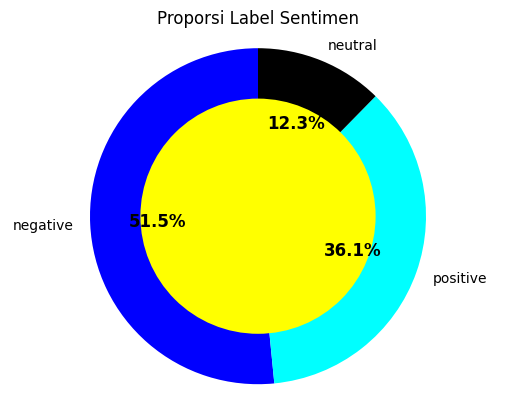

In [ ]:
# Contoh label dan count dari dataframe kamu
label_counts = df['label'].value_counts()

# Pastikan labels sesuai jumlah unik label
labels = label_counts.index
counts = label_counts.values

# Warna disesuaikan jumlah labels
colors = ['blue','aqua','black'][:len(labels)]

# Donut chart
fig, ax = plt.subplots()
wedges, texts, autotexts = ax.pie(
    counts,
    labels=labels,
    colors=colors,
    autopct='%1.1f%%',
    startangle=90,
    wedgeprops=dict(width=0.4)
)
print("Jumlah label positif:", label_counts.get('positive', 0))
print("Jumlah label netral:", label_counts.get('neutral', 0))
print("Jumlah label negatif:", label_counts.get('negative', 0))

# Tambahkan lingkaran tengah (donut hole)
centre_circle = plt.Circle((0,0),0.70,fc='yellow')
fig.gca().add_artist(centre_circle)

ax.set_title('Proporsi Label Sentimen')
plt.setp(autotexts, size=12, weight="bold")
plt.axis('equal')  # Circle
plt.show()

In [ ]:
print("Label unik:", df['label'].unique())
print("Jumlah kelas:", df['label'].nunique())


Label unik: ['negative' 'neutral' 'positive']
Jumlah kelas: 3


In [ ]:
# # prompt: buatkan kode untuk melihat label nutral ada di baris keberapa

# # Assuming 'df' is your DataFrame and 'label' is the column containing labels
# neutral_rows = df[df['label'] == 'nutral']

# # Print the index (row number) of rows where the label is 'netral'
# print("Baris dengan label 'netral':")
# print(neutral_rows.index.tolist())

In [ ]:
texts = df["preprocessed_text"].astype(str)
labels = df["label"].values

In [ ]:
file_path_kamus = '/content/drive/MyDrive/TugasAkhir/kamuskatabaku.xlsx'
kamus_df = pd.read_excel(file_path_kamus)
kamus = dict(zip(kamus_df['tidak_baku'], kamus_df['kata_baku']))  # Sesuaikan nama kolom

In [ ]:
def normalisasi_kata(teks):
    # Tokenisasi sederhana
    tokens = teks.lower().split()
    # Ganti dengan kata baku jika ditemukan di kamus
    tokens_baku = [kamus.get(token, token) for token in tokens]
    return ' '.join(tokens_baku)

# 3. Preprocessing teks (misalnya tanpa tanda baca + normalisasi)
def preprocess(text):
    text = re.sub(r'[^\w\s]', '', text.lower())  # Hilangkan tanda baca
    text = normalisasi_kata(text)
    return text

In [ ]:
# 4. Terapkan ke semua teks
texts_cleaned = [preprocess(t) for t in texts]

In [ ]:
# Inisialisasi TF-IDF Vectorizer
tfidf_vectorizer = TfidfVectorizer(
    max_features=5000,      # Gunakan 5000 fitur teratas
    ngram_range=(1, 2),     # Gunakan unigram dan bigram
    stop_words=None
)
# Latih vectorizer pada data teks
tfidf_vectorizer.fit(texts)

# Simpan TfidfVectorizer yang sudah dilatih ke file .pkl
joblib.dump(tfidf_vectorizer, '/content/drive/MyDrive/File_TA_Fiks/tfidf_vectorizer.pkl')

['/content/drive/MyDrive/File_TA_Fiks/tfidf_vectorizer.pkl']

In [ ]:
# Transformasi teks menjadi vektor TF-IDF
X_tfidf = tfidf_vectorizer.fit_transform(texts)

In [ ]:
# Simpan hasil embedding dan label
sparse.save_npz("/content/drive/MyDrive/File_TA_Fiks/X_tfidf.npz", X_tfidf)
np.save("/content/drive/MyDrive/File_TA_Fiks/y_tfidf.npy", labels)

In [ ]:
print("TF-IDF embedding dan label berhasil disimpan.")

TF-IDF embedding dan label berhasil disimpan.


In [ ]:
# Menampilkan beberapa baris pertama dari matriks TF-IDF
print("Contoh matriks TF-IDF:")
print(X_tfidf[:100].toarray())

# Menampilkan nama-nama fitur (kata atau ngram) yang dipelajari oleh vectorizer
print("\nNama-nama fitur (kata/ngram):")
print(tfidf_vectorizer.get_feature_names_out()[:20]) # Tampilkan 20 fitur pertama

# Menampilkan dimensi matriks TF-IDF
print(f"\nDimensi matriks TF-IDF: {X_tfidf.shape}")

Contoh matriks TF-IDF:
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]

Nama-nama fitur (kata/ngram):
['aahmad' 'aahmad tawalla' 'abdi' 'abdul' 'abdul kadir' 'abdul mu'
 'abdul muti' 'abdullah' 'abdullah hadir' 'abdurrahman' 'abimanyu' 'acara'
 'acara bekal' 'acara deklarasi' 'acara hadir' 'acara hari' 'acara joint'
 'acara lantik' 'acara luncur' 'acara national']

Dimensi matriks TF-IDF: (10229, 5000)


In [ ]:
feature_names = tfidf_vectorizer.get_feature_names_out()

In [ ]:
# Jumlah dokumen yang ingin dilihat
n_docs = X_tfidf.shape[0]

for i in range(min(n_docs, 5)):
    row = X_tfidf[i].toarray().flatten()  # Ubah baris i menjadi array 1D
    df = pd.DataFrame({'word': feature_names, 'tfidf': row})
    df = df[df['tfidf'] > 0].sort_values(by='tfidf', ascending=False)  # Hanya nilai > 0
    print(f"\n📄 Dokumen ke-{i}: 10 Kata/Ngram Teratas berdasarkan TF-IDF")
    print(df.head(5).to_string(index=False))


📄 Dokumen ke-0: 10 Kata/Ngram Teratas berdasarkan TF-IDF
           word    tfidf
      ariotedjo 0.370213
 dito ariotedjo 0.370213
           dito 0.364368
pemuda olahraga 0.348067
 menteri pemuda 0.348067

📄 Dokumen ke-1: 10 Kata/Ngram Teratas berdasarkan TF-IDF
         word    tfidf
        teddy 0.367515
          ahy 0.357716
        tajuk 0.248817
deret menteri 0.227925
        citra 0.216332

📄 Dokumen ke-2: 10 Kata/Ngram Teratas berdasarkan TF-IDF
      word    tfidf
  utakatik 0.395727
menit sama 0.382631
  strategi 0.372174
      haji 0.363468
     menit 0.354303

📄 Dokumen ke-3: 10 Kata/Ngram Teratas berdasarkan TF-IDF
              word    tfidf
            dukung 0.281432
          besar rp 0.243064
       gratis mbak 0.240143
prioritas nasional 0.240143
       gizi gratis 0.220324

📄 Dokumen ke-4: 10 Kata/Ngram Teratas berdasarkan TF-IDF
          word    tfidf
  hemat anggar 0.311018
subianto minta 0.295626
   minta jajar 0.289680
         hemat 0.277100
          cara